# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [4]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [5]:
var = 'Sales'

1) 변수의 비즈니스 의미

>각 지역 판매액

2) 숫자, 범주?

>숫자


3) NaN 존재 유무 및 조치방안

In [6]:
data[var].isna().sum()

0

4) 가변수화 필요 여부

> x

5) 기초통계량(수치화)

In [7]:
print(data[var].describe())

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64


6) 분포 확인(시각화)

<AxesSubplot:xlabel='Sales', ylabel='Count'>

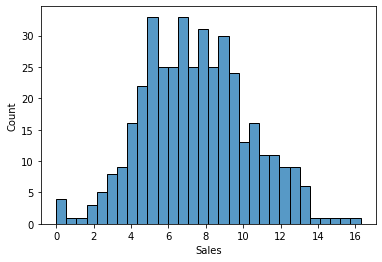

In [8]:
sns.histplot(data[var], bins=30)

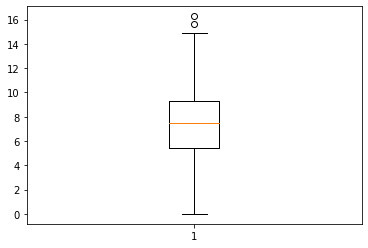

[5.39 0.  ]
[ 9.32 14.9 ]


In [9]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 일부지역에서 많은 주로 많이 산다.

> 넓게 분포되어 있음.

> 판매량이 0에 가까운 지역은, 연령대가  50~60대 이상일 것으로 예상됨

8) 추가 분석해 볼 사항이 있나요?

> 판매량과 연령대의 상관관계

### ② CompPrice

In [10]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

> 경쟁사 가격

2) 숫자, 범주?

>숫자

3) NaN 존재 유무 및 조치방안

In [11]:
data[var].isna().sum()

0

> NaN 없음

4) 가변수화 필요 여부

> 가변수화 x

5) 기초통계량(수치화)

In [12]:
print(data[var].describe())

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64


6) 분포 확인(시각화)

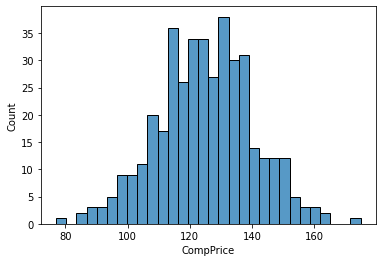

In [13]:
sns.histplot(data[var], bins = 30)
plt.show()

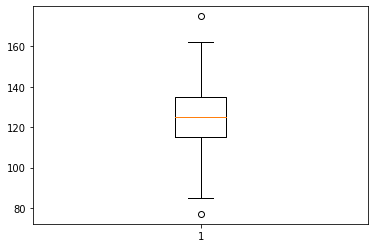

[115.  85.]
[135. 162.]


In [14]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> Sales와 거의 같은 분포를 보임

> => Sales와 반비례 관계를 보일 것으로 예상됨.


8) 추가 분석해 볼 사항이 있나요?

> Sales와의 상관관계

### ③ Income

In [15]:
var = 'Income'

1) 변수의 비즈니스 의미

> 지역 평균 소득

2) 숫자, 범주?

In [16]:
data[var].unique()

array([ 73,  48,  35, 100,  64, 113, 105,  81, 110,  78,  94,  28, 117,
        95,  32,  74,  76,  90,  29,  46,  31, 119, 115, 118,  99,  58,
        38,  54,  84,  41,  60,  98,  53,  69,  42,  79,  63,  52,  93,
        40, 103,  82,  91,  71, 102,  45,  88,  67,  26,  92,  61,  59,
        51,  68, 111,  87,  72,  83,  36,  25,  66,  22,  30,  97,  77,
        47,  96,  33, 107,  65,  62,  75,  89, 120,  34,  21,  39, 106,
        24, 112,  37,  70,  80,  44, 104,  43,  56, 114,  57,  86,  50,
        27, 101, 109,  55, 116, 108,  23])

> 숫자형

3) NaN 존재 유무 및 조치방안

In [17]:
data[var].isna().sum()

0

> 없음

4) 가변수화 필요 여부

없음

5) 기초통계량(수치화)

In [18]:
print(data[var].describe())

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64


6) 분포 확인(시각화)

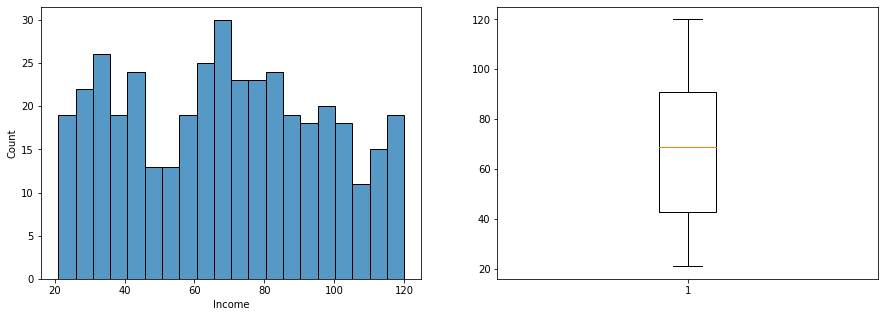

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data[var], bins=20)
plt.subplot(1,2,2)
plt.boxplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 판매량의 분포와 큰 차이를 보임

> 판매량과 큰 관계가 없을 가능성이 있음.

> 45까지의 구간과 60~105까지의 구간으로 나눠 볼 수 있을 것 같음.

8) 추가 분석해 볼 사항이 있나요?

### ④ Advertising

In [20]:
var = 'Advertising'

1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산

2) 숫자, 범주?

In [21]:
data[var].unique()

array([11, 16, 10,  4,  3, 13,  0, 15,  9,  2,  5, 12,  6, 14, 18, 19, 20,
       23,  1,  7, 24,  8, 17, 25, 26, 29, 22, 21])

> 숫자형 

3) NaN 존재 유무 및 조치방안

In [22]:
data[var].isna().sum()

0

> 없음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [23]:
print(data[var].describe())

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64


6) 분포 확인(시각화)

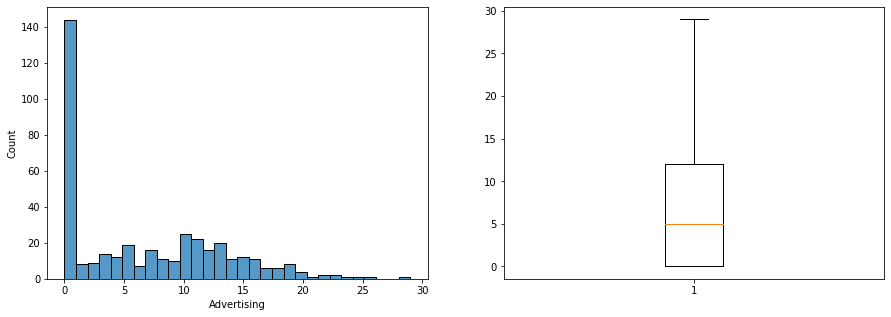

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data[var], bins=30)
plt.subplot(1,2,2)
plt.boxplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 광고를 극단적으로 많이한 지역은 왜 그렇게 많이 한 걸까?

> 대부분은 광고를 거의 하지 않음.

> 광고를 많이 한 지역이 효과를 보였다면, 광고를 다른 지역에도 해보는 것도 좋을 것 같다.

> 광고를 어느 정도 한 지역은 아마, 경쟁회사가 있는 지역이거나, 잠재적 고객(인구수 + Age)이 많을 것이라고 판단한 곳이겠지?

> 광고를 한 지역의 분포는 표준 정규 분포를 따르는 것 같음.

8) 추가 분석해 볼 사항이 있나요?

> 광고를 많이 한 지역이 그 성과가 있는 지 확인해보고 싶다.

### ⑤ Population

In [25]:
var = 'Population'

1) 변수의 비즈니스 의미

> 지역의 인구수

2) 숫자, 범주?

In [26]:
data[var].unique()

array([276, 260, 269, 466, 340, 501,  45, 425, 108, 131, 150, 503, 393,
        29, 148, 400, 284, 251, 408,  58, 367, 239, 497, 292, 294, 176,
       496,  19, 359, 226, 447, 241, 236, 317, 406, 270, 412, 454, 144,
        18, 403,  25,  16, 325, 168, 173, 349,  51, 341, 112,  39,  60,
        54,  22, 188, 469, 358, 146, 170, 184, 197, 508, 152, 366, 339,
       237, 432, 125, 480, 346,  44, 139, 286, 353, 468,  52, 304, 272,
       493, 491, 267,  97,  67, 134, 407, 287, 382, 220,  94,  89,  57,
       334, 472, 398, 217, 104, 488, 298, 335,  17,  95, 202, 507, 243,
       137, 249, 380, 181, 192, 350, 279, 208, 232, 265, 327, 384,  10,
       436, 371, 310, 277, 331, 300,  36, 264,  27, 402, 140, 289,  59,
       189, 372, 486,  81, 424,  40, 100, 151, 216, 492, 356, 416, 123,
       207,  38,  70, 434,  79, 230, 426,  35, 449,  93, 142, 509, 297,
        71, 481, 420, 410, 333, 500, 413, 132, 326, 357, 445,  48, 156,
       262, 178, 464, 245,  68, 381, 404, 119,  24, 218, 361, 49

> 숫자

3) NaN 존재 유무 및 조치방안

In [27]:
data[var].isna().sum()

0

> 없음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [28]:
print(data[var].describe())

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64


6) 분포 확인(시각화)

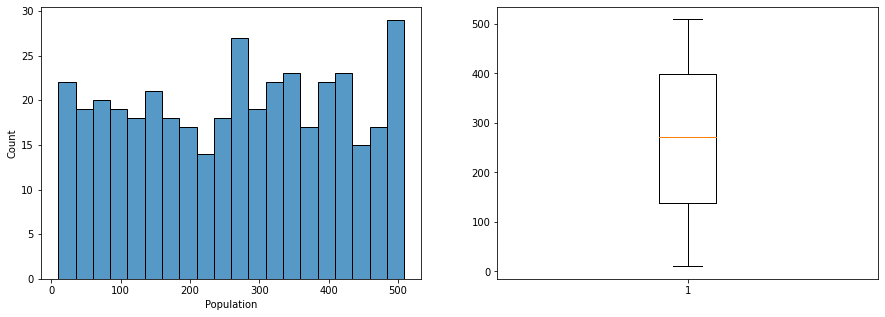

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.histplot(data[var], bins=20)
plt.subplot(1,2,2)
plt.boxplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 인구 수와 sales의 분포가 확연히 차이 남.

> 인구수가 중요하지 않은걸까?

> 인구수가 많더라도 연령대가 맞지 않다면 팔리지 않는걸까?

> 인구수보다 중요한 다른 요인이 있을것 같다.

8) 추가 분석해 볼 사항이 있나요?

### ⑥ Price

In [30]:
var = 'Price'

1) 변수의 비즈니스 의미

> 지역별 판매 가격

2) 숫자, 범주?

In [31]:
data[var].unique()

array([120,  83,  80,  97, 128,  72, 108, 124, 100,  94, 136,  86, 118,
       144, 110, 131,  68, 121, 109, 138, 113,  82, 107, 102,  89, 137,
        96, 126,  24, 134,  95, 135,  70,  98, 149, 129, 119, 154,  84,
       117, 103, 114, 123, 133, 101, 104,  91, 115,  99, 150, 116,  92,
       145,  90,  79, 139, 112, 111, 125, 148, 132, 127, 106, 151,  87,
       155,  49, 147,  77, 159,  69, 157, 160, 141, 191,  93,  55, 185,
       122,  81, 140, 173, 146, 130,  64, 105, 163,  88, 156, 166,  63,
       158,  74,  54, 171, 152, 143, 164, 162,  53,  78])

> 숫자

3) NaN 존재 유무 및 조치방안

In [32]:
data[var].isna().sum()

0

> 없음

4) 가변수화 필요 여부

> 없음

5) 기초통계량(수치화)

In [33]:
print(data[var].describe())

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64


6) 분포 확인(시각화)

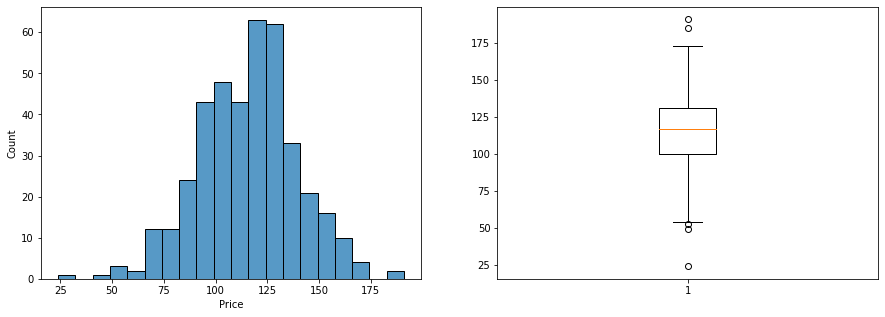

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data[var], bins=20)
plt.subplot(1,2,2)
plt.boxplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 가격과 비슷한 분포를 보이는 것으로 보아 영향이 클 것으로 보임

8) 추가 분석해 볼 사항이 있나요?

> 가격과의 상관관계


### ⑦ ShelveLoc

In [35]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미


> 진열상태

2) 숫자, 범주?

In [36]:
data[var].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

> 범주형

3) NaN 존재 유무 및 조치방안

In [37]:
data[var].isna().sum()

0

> 없음


4) 가변수화 필요 여부

> 가변수화 필요

5) 기초통계량(수치화)

In [38]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

/Users/joyeonglae/.pyenv/versions/3.9.5/envs/pandas_learn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


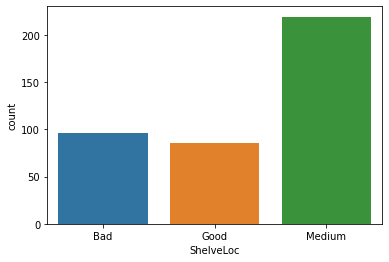

In [39]:
sns.countplot(data[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 판매량과 상관관계가 있을 것으로 보임.

8) 추가 분석해 볼 사항이 있나요?

### ⑧ Age

In [40]:
var = 'Age'

1) 변수의 비즈니스 의미

> 지역 연령대

2) 숫자, 범주?

In [41]:
data[var].unique()

array([42, 65, 59, 55, 38, 78, 71, 67, 76, 26, 50, 62, 53, 52, 63, 46, 69,
       35, 79, 54, 64, 58, 30, 44, 60, 73, 48, 32, 80, 75, 39, 61, 74, 29,
       77, 56, 47, 25, 31, 36, 41, 68, 70, 28, 43, 49, 45, 33, 34, 51, 40,
       72, 57, 27, 66, 37])

> 숫자

3) NaN 존재 유무 및 조치방안

In [42]:
data[var].isna().sum()

0

> 없음

4) 가변수화 필요 여부

> 가변수화 필요함

5) 기초통계량(수치화)

In [49]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Yes    282
No     118
Name: Urban, dtype: int64
Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

/Users/joyeonglae/.pyenv/versions/3.9.5/envs/pandas_learn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


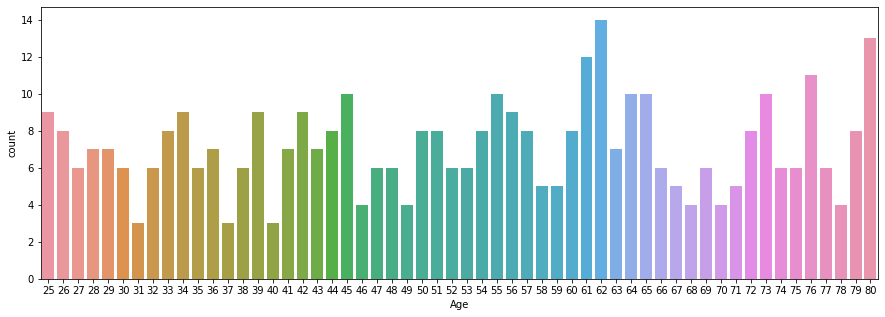

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(data[var])
plt.xticks()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

8) 추가 분석해 볼 사항이 있나요?

### ⑨ Urban

In [45]:
var = 'Urban'

1) 변수의 비즈니스 의미

도심지역인가?

2) 숫자, 범주?

In [46]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

> 범주형

3) NaN 존재 유무 및 조치방안

In [48]:
data[var].isna().sum()

0

> 없음

4) 가변수화 필요 여부

> 필요

5) 기초통계량(수치화)

In [50]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Yes    282
No     118
Name: Urban, dtype: int64
Yes    0.705
No     0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

/Users/joyeonglae/.pyenv/versions/3.9.5/envs/pandas_learn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


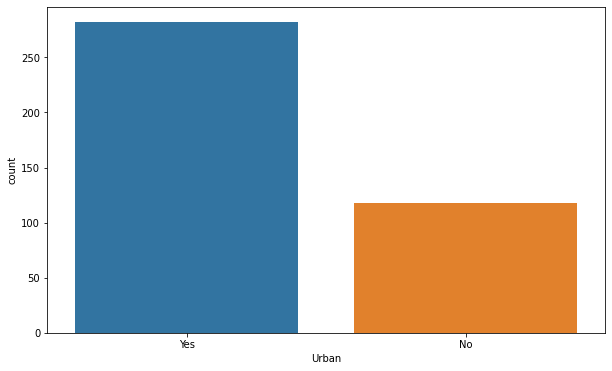

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(data[var])
plt.xticks()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 도심 지역이 더 많음..

> 도심 지역이 인구가 많을테니 광고도 더했으려나..

> 도심지역의 판매량이 더 높을거라고 생각함.

8) 추가 분석해 볼 사항이 있나요?

> 도심지역과 아닌 지역의 판매 평균 비교

### ⑩ US

In [54]:
var= 'US'

1) 변수의 비즈니스 의미

> 해당지점이 미국지점인지

2) 숫자, 범주?

In [55]:
data[var].unique()

array(['Yes', 'No'], dtype=object)

> 범주형

3) NaN 존재 유무 및 조치방안

In [57]:
data[var].isna().sum()

0

> 없음

4) 가변수화 필요 여부

> 필요

5) 기초통계량(수치화)

In [58]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

/Users/joyeonglae/.pyenv/versions/3.9.5/envs/pandas_learn/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


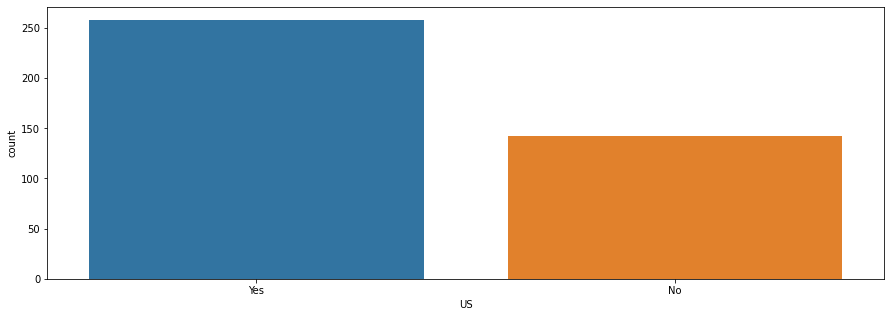

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(data[var])
plt.xticks()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 미국 지점이 더 많음

> 미국 지점이 더 판매량이 많을 거 같기도 함.





8) 추가 분석해 볼 사항이 있나요?

> 수출시 가격은 그대로인지 알아야 할 것 같고.. 왠지 더 비쌀 듯
